# Getting Ready for Analysis

Run the below cell to install all the required packages for this notebook.

In [1]:
!pip3 install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


# Sentiment Analysis

I used two approaches in predicting the sentiment of the given data.

* Lexicon based Sentiment Method
* Machine Learning based Sentiment Method

In the lexicon-based method, I have used two third-party libraries to predict the sentiments.

* TextBlob
* vaderSentiment

Both of these methods used a pre-defined valance score of the words to predict tweets' sentiment.

Coming to Machine Learning based prediction, we cannot use any traditional method of training the model and predicting on test data.

But we are provided with the unlabelled data. So, we cannot carry out the supervised learning strategy

So, I have used the IMDB Movie review dataset to train a neural network model and then use that model to predict the given tweets data.

This gave a very similar result compared to the lexicon-based methods.

**Why these modules?**

* *re:* It is used in preprocessing the data.

* *emoji:* To remove all the emoji's (part of preprocessing step)

* *numpy:* For doing some numerical calculations

* *pandas:* For loading the data into dataframe's

* *sklearn:* Splitting the dataset into train and test sets

* *tensorflow:* To build the machine learning

* *matplotlib:* For visualization of graphs and plots

* *textblob:* To compute lexicon based sentiment(method-1)

* *vaderSentiment:* To compute lexicon based sentiment(method-2)

In [2]:
# Required modules

import re
import emoji
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

from textblob import TextBlob
from sklearn.model_selection import train_test_split
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 7)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

In [3]:
# Loading the data

data = pd.read_csv('./data/tweets.zip', compression='zip')
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1262787913311387649,1262787913311387649,1589907074000,2020-05-19,16:51:14,UTC,1250079805980045318,dramaflick,The Drama Flick,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1250079805980045318', 'username'...",NaN,NaN,NaN,NaN
1,1262787786152620040,1262787786152620040,1589907044000,2020-05-19,16:50:44,UTC,807843238648299520,knowpuneet,TravelTrainee,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '807843238648299520', 'username':...",NaN,NaN,NaN,NaN
2,1262787219498000384,1262787219498000384,1589906909000,2020-05-19,16:48:29,UTC,1085426639570235392,narasinhpurohit,Narasinh Purohit,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1085426639570235392', 'username'...",NaN,NaN,NaN,NaN
3,1262786998592434176,1262786998592434176,1589906856000,2020-05-19,16:47:36,UTC,1104213868467806208,ka_trolls,Humans Of Hindutva,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1104213868467806208', 'username'...",NaN,NaN,NaN,NaN
4,1262786970163441669,1262786970163441669,1589906849000,2020-05-19,16:47:29,UTC,392180204,rajendrabohora,rajendrabohora,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '392180204', 'username': 'rajendr...",NaN,NaN,NaN,NaN


In [4]:
# Inspecting the data

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124384 entries, 0 to 124383
Data columns (total 34 columns):
id                 124384 non-null int64
conversation_id    124384 non-null int64
created_at         124384 non-null int64
date               124384 non-null object
time               124384 non-null object
timezone           124384 non-null object
user_id            124384 non-null int64
username           124384 non-null object
name               124384 non-null object
place              9143 non-null object
tweet              124384 non-null object
mentions           124384 non-null object
urls               124384 non-null object
photos             124384 non-null object
replies_count      124384 non-null int64
retweets_count     124384 non-null int64
likes_count        124384 non-null int64
hashtags           124384 non-null object
cashtags           124384 non-null object
link               124384 non-null object
retweet            124384 non-null bool
quote_url         

,id,conversation_id,created_at,user_id,replies_count,retweets_count,likes_count,video,near,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest
count,1.243840e+05,1.243840e+05,1.243840e+05,1.243840e+05,124384.000000,124384.000000,124384.000000,124384.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.248684e+18,1.248494e+18,1.586544e+12,4.351165e+17,0.667626,2.077044,7.881858,0.061953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.229079e+16,2.304835e+16,5.369331e+09,5.240636e+17,11.845734,28.424693,121.299772,0.241072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,8.660923e+08,8.660923e+08,1.216819e+12,3.160000e+03,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.243007e+18,1.242870e+18,1.585191e+12,2.617597e+08,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.247014e+18,1.246851e+18,1.586146e+12,2.940158e+09,0.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.256459e+18,1.256427e+18,1.588398e+12,9.912536e+17,0.000000,0.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.263035e+18,1.263035e+18,1.589966e+12,1.262808e+18,2044.000000,3710.000000,19929.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that most of the columns in the dataset are empty, so dropping these columns is better.

## Dealing with Missing values

In [5]:
nan_cols = data.columns[data.isna().any()]
print("Columns which contains missing values: ")
nan_cols

Columns which contains missing values: 


Index(['place', 'quote_url', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'retweet_date', 'translate', 'trans_src', 'trans_dest'],
      dtype='object')

In [6]:
print("Percentage of Missing values in the columns: ")
(data[nan_cols].isna().sum()) / len(data)

Percentage of Missing values in the columns: 


place           0.926494
quote_url       0.895220
near            1.000000
geo             1.000000
source          1.000000
user_rt_id      1.000000
user_rt         1.000000
retweet_id      1.000000
retweet_date    1.000000
translate       1.000000
trans_src       1.000000
trans_dest      1.000000
dtype: float64

In [7]:
# Dropping all the columns which consists of missing values
data.drop(nan_cols, axis=1, inplace=True)

In [8]:
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'tweet', 'mentions', 'urls', 'photos',
       'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'video', 'reply_to'],
      dtype='object')


By careful inspection, we can observe that all the columns except 'tweet' and 'hashtags' are redundant and can be dropped.

In [9]:
actual_data = data[['tweet', 'hashtags']]
actual_data

,tweet,hashtags
0,https://www.youtube.com/watch?v=-CRbO7ExO1k …...,"['#lockdownindia', '#lockdown', '#indiafightsc..."
1,Lockdown 4.0 ka.naam hi lockdown hai\nHai sab ...,"['#lockdownindia', '#locldown4']"
2,CORONA VIRUS THREAT-\nHOW TO OVERCOME STRESS A...,"['#covid_19', '#covid_19sa', '#covid_19india',..."
3,Could you please\n\n#lockdownindia\n@Bhuvan_Ba...,"['#lockdownindia', '#roastchallenge', '#journa..."
4,"In fight with #COVID19, You are the best Docto...","['#covid19', '#coronavirus', '#patiencechallen..."
...,...,...
124379,I pledge to follow the appeal given by Hon'ble...,"['#staysafestayhome', '#janta_curfew', '#janta..."
124380,Four new cases of Coronavirus detected in Luck...,"['#coronaindia', '#coronavirusoutbreakindia', ..."
124381,Do you sometimes feel a tingling #sensation or...,"['#sensation', '#hands', '#thevoiceofwoman', '..."
124382,Some Time we have to Stay Back ... Just to Sav...,"['#stayback', '#gobackcorona', '#coronafighter..."


## Preprocessing data

In this, preprocessing step I have removed all the unneccessary information using the regular expression(re) modules like:

```python
re.sub(r'(#\w+)', ' ', x) # to remove all the hashtags in the text.
```
```python
re.sub(r'(\n)', ' ', x) # to remove all the newline characters in the text.
```
```python
re.sub(r'(@\w+)', ' ', x) # to remove all the handles in the text.
```
```python
re.sub(r'(…)', ' ', x) # to remove '…' from the text.
```
```python
re.sub(r'(pic.twitter.com/\w+)', ' ', x) # to remove all pic URLS in the text.
```
```python
re.sub(r'([^a-zA-Z0-9])\1+', r'\1', x) # to remove all repeating characters except alphabets and numbers.
```
```python
re.sub(r'(http|https|ftp)://[a-zA-Z0-9\\.\?\-\=/]+\xa0', ' ', x) # to remove all URLS in the text.
```

In [10]:
# Removing all the unwanted information from of data

actual_data['tweet'] = actual_data['tweet'].apply(lambda x: re.sub(r'#\w+', ' ', x))                                                                
actual_data['tweet'] = actual_data['tweet'].apply(lambda x: re.sub(r'\n', ' ', x))                                                                  
actual_data['tweet'] = actual_data['tweet'].apply(lambda x: re.sub(r'pic.twitter.com/\w+', ' ', x))                                                            
actual_data['tweet'] = actual_data['tweet'].apply(lambda x: re.sub(r'@\w+', ' ', x))
actual_data['tweet'] = actual_data['tweet'].apply(lambda x: re.sub(r'(http|https|ftp)://[a-zA-Z0-9\\.\?\-\=/]+\xa0', ' ', x))
actual_data['tweet'] = actual_data['tweet'].apply(lambda x: re.sub(r'…', ' ', x))                                                          
actual_data['tweet'] = actual_data['tweet'].apply(lambda x: re.sub(r'([^a-zA-Z0-9])\1+', r'\1', x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

data1, data2, data3 all are the copies of the actual_data dataframe's

* data1 is used in sentiment prediction using textblob.

* data2 is used in sentiment prediction using vaderSentiment.

* data3 is used in sentiment prediction using machine learning method.

In [11]:
# Making a copy of original dataset to be used for different strategy

data1 = actual_data.copy()
data2 = actual_data.copy()
data3 = actual_data.copy()

## Lexicon based sentiment analysis

### TextBlob
This sentiment analysis is done using TextBlob function of the module textblob.

The output of the function is a 2-element tuple which has a structure (polarity_value, subjectivity).

In [12]:
data1['sentiment'] = data1['tweet'].apply(lambda x: TextBlob(x).sentiment)

In [13]:
data1['polarity_value'] = data1['sentiment'].apply(lambda x: x[0])
data1['subjectivity'] = data1['sentiment'].apply(lambda x: x[1])

In [14]:
data1['polarity_type'] = np.where(data1['polarity_value'].values > 0, 'Positive', np.where(data1['polarity_value'].values < 0, 'Negative', 'Neutral'))

In [15]:
# Count of each type of tweets

data1['polarity_type'].value_counts()

Positive    54165
Neutral     47780
Negative    22439
Name: polarity_type, dtype: int64

#### Visualization of data

First plot, contains the Number of tweets for each type of tweets.

Second plot, contains the distribution of sentiment of all the tweets on the scale of \[-1, 1\](-1 being most negative, 1 being most positive).

<BarContainer object of 3 artists>

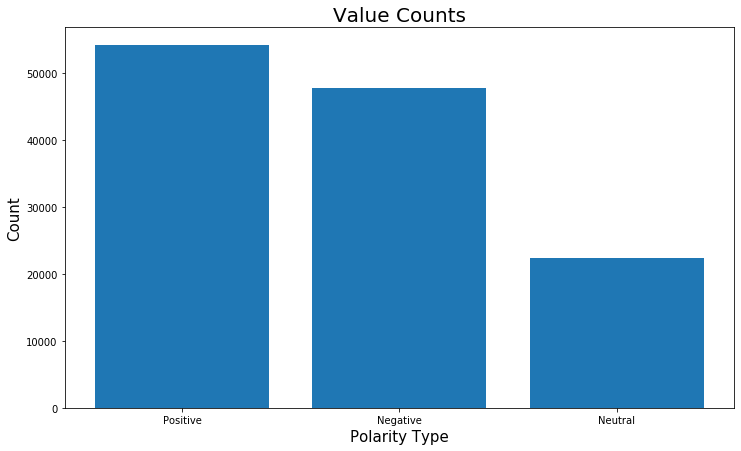

In [16]:
# Polarity count

_, ax = plt.subplots()
ax.set_title("Value Counts", fontsize=20)
ax.set_xlabel("Polarity Type", fontsize=15)
ax.set_ylabel("Count", fontsize=15)
ax.bar(data1['polarity_type'].unique(), height=data1['polarity_type'].value_counts())

(array([3.2400e+02, 5.0000e+01, 2.7300e+02, 3.4700e+02, 4.8100e+02,
        2.1510e+03, 1.8610e+03, 3.3110e+03, 6.7980e+03, 6.8430e+03,
        5.9218e+04, 1.3030e+04, 8.6690e+03, 6.9420e+03, 2.3010e+03,
        7.0940e+03, 1.8880e+03, 4.6600e+02, 1.2830e+03, 1.0540e+03]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 20 Patch objects>)

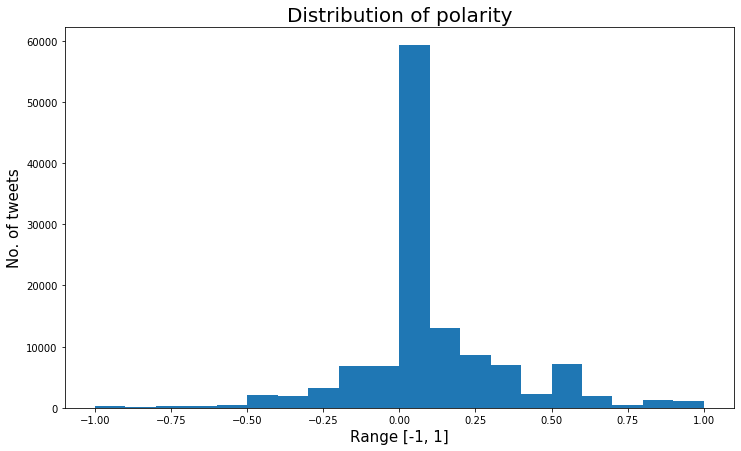

In [17]:
# Distribution of the polarity value

_, ax = plt.subplots()
ax.set_title("Distribution of polarity", fontsize=20)
ax.set_xlabel("Range [-1, 1]", fontsize=15)
ax.set_ylabel("No. of tweets", fontsize=15)

ax.hist(data1['polarity_value'], bins=20)

### VaderSentiment
This sentiment analysis is done using VaderSentiment module.

The output of the function is a dictionary which contains four keys 'positive', 'negative', 'neutral', 'compound'

compound gives the overall sentiment of the tweet.

positive says how much positive is the given tweet.

negative says how much negative is the given tweet.

neutral says how much neutral is the given tweet.

In [18]:
analyzer = SentimentIntensityAnalyzer()

data2['sentiment'] = data2['tweet'].apply(lambda x: analyzer.polarity_scores(x))

In [19]:
data2['positive'] = data2['sentiment'].apply(lambda x: x['pos'])
data2['negative'] = data2['sentiment'].apply(lambda x: x['neg'])
data2['neutral'] = data2['sentiment'].apply(lambda x: x['neu'])

data2['polarity_value'] = data2['sentiment'].apply(lambda x: x['compound'])

In [20]:
data2['polarity_type'] = np.where(data2['polarity_value'].values > 0.05, 'Positive', np.where(data2['polarity_value'].values < -0.05, 'Negative', 'Neutral'))

In [21]:
# Count of each type of tweets

data2['polarity_type'].value_counts()

Positive    59641
Neutral     34188
Negative    30555
Name: polarity_type, dtype: int64

#### Visulization of data

First plot, contains the Number of tweets for each type of tweets.

Second plot, contains the degree of degree of polarity of each polarity type.

<BarContainer object of 3 artists>

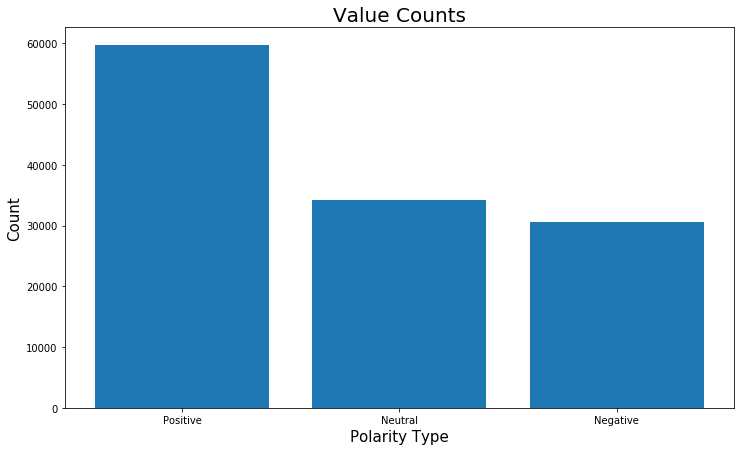

In [22]:
# Polarity count

_, ax = plt.subplots()
ax.set_title("Value Counts", fontsize=20)
ax.set_xlabel("Polarity Type", fontsize=15)
ax.set_ylabel("Count", fontsize=15)
ax.bar(data2['polarity_type'].unique(), height=data2['polarity_type'].value_counts())

(array([  228.,   184.,   712.,  1327.,  3573.,  8682., 16542., 25040.,
        27808., 40288.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

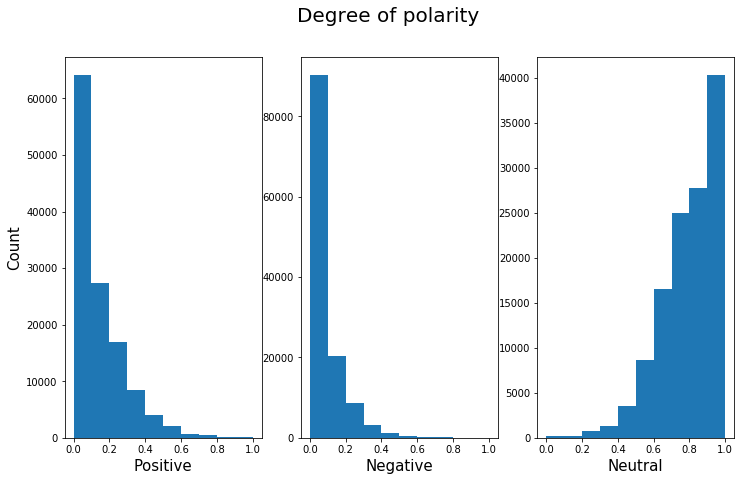

In [23]:
# Degree of polarity

fig, ax = plt.subplots(nrows=1, ncols=3)
fig.suptitle("Degree of polarity", fontsize=20)
ax[0].set_xlabel("Positive", fontsize=15)
ax[1].set_xlabel("Negative", fontsize=15)
ax[2].set_xlabel("Neutral", fontsize=15)
ax[0].set_ylabel("Count", fontsize=15)

ax[0].hist(data2['positive'])
ax[1].hist(data2['negative'])
ax[2].hist(data2['neutral'])

## Machine Learning based Sentiment Analysis

Using the imdb dataset to train and build the neural network, after that apply the neural network on the tweets data given.

In [24]:
# Loading the data

imdb_data = pd.read_csv('./data/imdb_data.zip', compression='zip')
imdb_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# Inspecting data

imdb_data.info()
imdb_data.describe()

### Preprocessing

Removing all the html tags in the text.

In [26]:
# Some preprocssing
# There are some html break tags(replacing them with ' ')

imdb_data['review'] = [re.sub(r'<.*?>', ' ', review) for review in imdb_data['review']]

In [27]:
# Adding few columns

imdb_data['review_len'] = imdb_data['review'].apply(lambda x: len(x.split()))

In [28]:
# Converting 'sentiment' into numerical value

imdb_data['sentiment_numerical'] = np.where(imdb_data['sentiment'] == 'positive', 1, 0)

In [29]:
# Separating out features and labels

X = imdb_data['review']
y = imdb_data['sentiment_numerical']

In [30]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=88)

In [31]:
max_words = 10000
oov_token = '<OOV>'

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_words, oov_token=oov_token)

In [32]:
tokenizer.fit_on_texts(X)
tokenizer.word_index

{'<OOV>': 1,
 'the': 2,
 'and': 3,
 'a': 4,
 'of': 5,
 'to': 6,
 'is': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'be': 26,
 'one': 27,
 'he': 28,
 'all': 29,
 'at': 30,
 'by': 31,
 'an': 32,
 'they': 33,
 'so': 34,
 'who': 35,
 'from': 36,
 'like': 37,
 'or': 38,
 'just': 39,
 'her': 40,
 'out': 41,
 'about': 42,
 'if': 43,
 "it's": 44,
 'has': 45,
 'there': 46,
 'some': 47,
 'what': 48,
 'good': 49,
 'when': 50,
 'more': 51,
 'very': 52,
 'up': 53,
 'no': 54,
 'time': 55,
 'my': 56,
 'even': 57,
 'would': 58,
 'she': 59,
 'which': 60,
 'only': 61,
 'really': 62,
 'see': 63,
 'story': 64,
 'their': 65,
 'had': 66,
 'can': 67,
 'me': 68,
 'well': 69,
 'were': 70,
 'than': 71,
 'much': 72,
 'we': 73,
 'bad': 74,
 'been': 75,
 'get': 76,
 'do': 77,
 'great': 78,
 'other': 79,
 'will': 80,
 'also': 81,
 'into': 82,


In [33]:
# Converting tokens into Sequences

X_train_tokens = tokenizer.texts_to_sequences(X_train)
X_test_tokens = tokenizer.texts_to_sequences(X_test)

In [34]:
max_train_word = int(np.mean(imdb_data['review_len']) + 2 * np.std(imdb_data['review_len']))

In [35]:
# Padding the input to make it uniform length

pad_type = 'pre'

X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train_tokens, maxlen=max_train_word, padding=pad_type, truncating=pad_type)
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(X_test_tokens, maxlen=max_train_word, padding=pad_type, truncating=pad_type)

***Model Architecture***

My model consists of 5 layers,
1. Embedding layer (with a dimension of 8)
  
  which finds the word embedding's of all the unique words in the text which are tokenized by the 'tokenizer' function.

2. LSTM (with an input dimension of 16)
3. LSTM (with an input dimension of 8)
4. LSTM (with an input dimension of 4)
5. Dense (this output, the sentiment)

For more information about the model you can see cell number 39.

***Hyperparameters***

The Hyperparameters for this model are
* Input dimension
* Ouput dimension
* Length of the input sequence
* Number of layers and there dimension's
* Number of epochs
* Batch Size

In [36]:
# Defining the model

embedding_dim = 8

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words,
                             output_dim=embedding_dim,
                             input_length=max_train_word,
                             name='embedding_layer'),
    tf.keras.layers.LSTM(units=16, return_sequences=True),
    tf.keras.layers.LSTM(units=8, return_sequences=True),
    tf.keras.layers.LSTM(units=4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [37]:
# Defining the optimizer

optimizer = tf.keras.optimizers.Adam(lr=0.1)

In [38]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizer,
             metrics=['acc'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 568, 8)            80000     
_________________________________________________________________
unified_lstm (UnifiedLSTM)   (None, 568, 16)           1600      
_________________________________________________________________
unified_lstm_1 (UnifiedLSTM) (None, 568, 8)            800       
_________________________________________________________________
unified_lstm_2 (UnifiedLSTM) (None, 4)                 208       
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 82,613
Trainable params: 82,613
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Model fitting on the training data

epochs=3
batch_size = 64

history = model.fit(X_train_padded, y_train, validation_split=0.05, epochs=epochs, batch_size=batch_size)

Train on 35625 samples, validate on 1875 samples
Epoch 1/3
35625/35625 [==============================] - 475s 13ms/sample - loss: 0.5990 - acc: 0.6638 - val_loss: 0.4796 - val_acc: 0.7739
Epoch 2/3
35625/35625 [==============================] - 495s 14ms/sample - loss: 0.4278 - acc: 0.8044 - val_loss: 0.4274 - val_acc: 0.8048
Epoch 3/3
35625/35625 [==============================] - 531s 15ms/sample - loss: 0.3969 - acc: 0.8219 - val_loss: 0.4303 - val_acc: 0.8096


In [41]:
# Measuring Training Loss 

train_loss = model.evaluate(X_train_padded, y_train)
print("Training accuracy: {:6f}".format(train_loss[1]))

37500/37500 [==============================] - 108s 3ms/sample - loss: 0.3926 - acc: 0.8258
Training accuracy: 0.825787


In [42]:
# Measuring Testing Loss

test_loss = model.evaluate(X_test_padded, y_test)
print("Testing accuracy: {:6f}".format(test_loss[1]))

12500/12500 [==============================] - 37s 3ms/sample - loss: 0.4067 - acc: 0.8182
Testing accuracy: 0.818240


## Now introducing the original data

### Some preprocessing

Removing all the emoji's from the text and converting the text into lower case.

In [43]:
# Removing unnecessary spaces and emoji's 

data3['tweet'] = data3['tweet'].apply(lambda x: " ".join(map(str.lower, x.split())))
data3['tweet'] = data3['tweet'].apply(lambda x: "".join([char for char in x if char not in emoji.UNICODE_EMOJI]))

### Prediction using pretrained model

In [44]:
# Applying trained model on tweets data

X_data_tokens = tokenizer.texts_to_sequences(data3['tweet'])
X_data_padded = tf.keras.preprocessing.sequence.pad_sequences(X_data_tokens, maxlen=max_train_word, padding=pad_type, truncating=pad_type)

In [50]:
predicted = model.predict(X_data_padded)
sentiment = np.where(predicted > 0.5, 'Positive', 'Negative') 

In [52]:
final_data = pd.DataFrame(data=np.append(predicted, sentiment, axis=1), columns=['Polarity_value', 'Polarity_type'])

### Visualization

<BarContainer object of 2 artists>

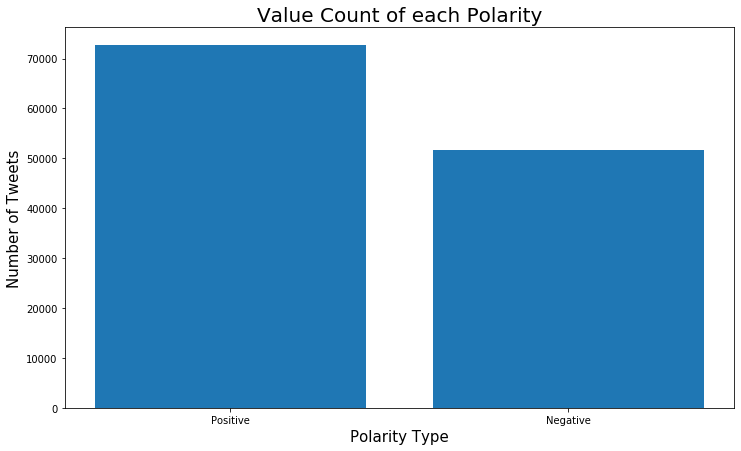

In [53]:
# Some plots

_, ax = plt.subplots()
ax.set_xlabel("Polarity Type", fontsize=15)
ax.set_ylabel("Number of Tweets", fontsize=15)
ax.set_title("Value Count of each Polarity", fontsize=20)
ax.bar(final_data['Polarity_type'].unique(), final_data['Polarity_type'].value_counts())